# Tugas Computer Vision - Annotations and Enhancements

## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Save as... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA: Rafika Latif
### NIM: A710190129

#### Lengkapi kode di bawah dan jalankan

In [1]:
from time import ctime
from os import getcwd
import sys
nama = "RAFIKA LATIF"     ## Ganti dengan namamu
NIM = "A710190129"     ## Ganti dengan NIM-mu
kota = "Surakarta"     ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: RAFIKA LATIF
NIM : A710190129
Kota: Surakarta
Tue Apr  5 15:12:25 2022

D:\Kuliah_UMS\Computer_Vision
C:\Users\acer\AppData\Local\Programs\Python\Python310\python.exe
3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]


In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

## Image Annotations
Memakai OpenCV, bukalah file tugu monas yang sudah disertakan, lalu:
1. Berilah kotak (warna bebas, pilihlah yang kontrasnya bagus) pada bagian Masjid Istiqlal, lalu beri keterangan (dengan warna huruf yang sama) *di bawahnya* bahwa yang dibingkai adalah masjid istiqlal.
2. Berilah lingkaran pada puncak monas (warna bebas, tapi berbeda dengan yang masjid istiqlal di atas), lalu beri keterangan (dengan warna huruf yang sama) *di sebelah kanannya* bahwa yang dilingkari adalah puncak monas.

Tampilkan hasilnya.


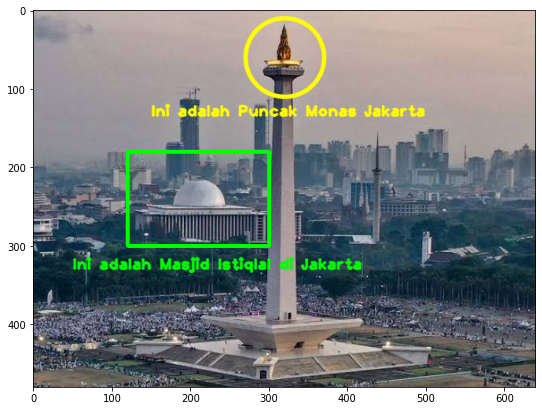

In [11]:
## Tugu monas:
image = cv2.imread("Tugu-Monas.jpeg", cv2.IMREAD_COLOR)
manipulation = image.copy()

#masjid istiqlal

cv2.rectangle(manipulation, (120, 180), (300,300), (0, 255, 0), thickness=4, lineType=cv2.LINE_8);

text_masjid = "Ini adalah Masjid Istiqlal di Jakarta"
cv2.putText(manipulation, text_masjid, (50, 330), cv2.FONT_HERSHEY_PLAIN, 1.3, (0, 255, 0), 2, cv2.LINE_AA);

#monas

cv2.circle(manipulation, (320,60), 50, (0, 255, 255), thickness=4, lineType=cv2.LINE_AA);

text_monas = "Ini adalah Puncak Monas Jakarta"
cv2.putText(manipulation, text_monas, (150, 135), cv2.FONT_HERSHEY_PLAIN, 1.3, (0, 255, 255), 2, cv2.LINE_AA);

plt.imshow(manipulation[:,:,::-1])

Memakai OpenCV, bukalah gambar **ikon kotamu** (yang sudah dipakai sejak tugas pertama), lalu:
1. Berilah kotak pada feature yang menonjol, lalu berilah keterangan bentuk / bangunan apakah itu
2. Memakai FONT yang BERBEDA, berilah keterangan di bagian bawahnya, gambar apa itu dan lokasinya di mana

Tampilkan hasilnya.

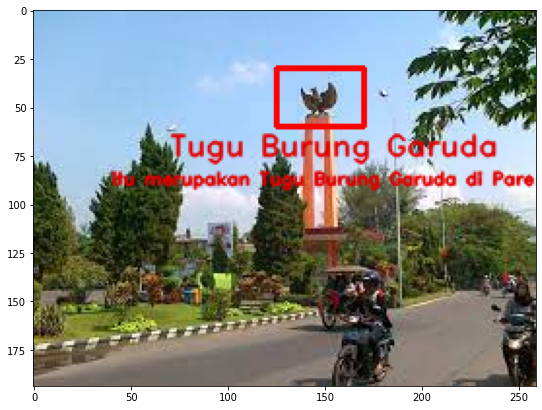

In [39]:
##### Ikon kota:
image = cv2.imread("tugu.jpg", cv2.IMREAD_COLOR)
tol = image.copy()

cv2.rectangle(tol, (125, 30), (170,60), (0, 0, 255), thickness=2, lineType=cv2.LINE_8);

text_toll = "Tugu Burung Garuda"
text_sal = "itu merupakan Tugu Burung Garuda di Pare"
cv2.putText(tol, text_toll, (70, 75), 2, 0.5, (0, 0, 225), 1, cv2.LINE_AA);
cv2.putText(tol, text_sal, (40, 90), 2, 0.3, (0, 0, 225), 1, cv2.LINE_AA);


plt.imshow(tol[:,:,::-1])

## Basic Image Enhancements

### Addition
Memakai OpenCV, bukalah file ikon kotamu, lalu:
1. Di tiap pixel, di tiap channel (BRG), kurangi nilainya sebesar 60
2. Di tiap pixel, di tiap channel (BRG), tambahi nilainya sebesar 60

Tampilkan hasilnya dan beri komentar, apa bedanya dengan gambar aslinya.

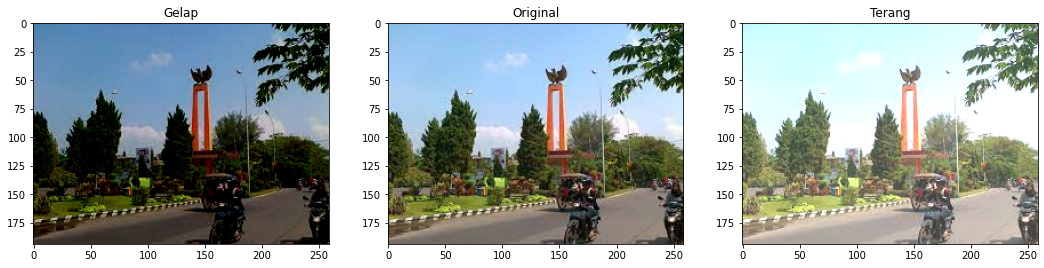

In [40]:
## Ikon kota
img_bgr = cv2.imread("tugu.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

matrix = np.ones(img_rgb.shape, dtype = "uint8") * 60
img_rgb_Terang = cv2.add(img_rgb, matrix)
img_rgb_Gelap   = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_Gelap);  plt.title("Gelap");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_Terang);plt.title("Terang");

### Multiplication
Memakai OpenCV, bukalah file gambar ikon kotamu, lalu:
1. Di tiap pixel, di tiap channel (BRG), kalikan nilainya sebesar 0.7
2. Di tiap pixel, di tiap channel (BRG), tambahi nilainya sebesar 1.3

Tampilkan hasilnya dan beri komentar, apa bedanya dengan gambar aslinya.


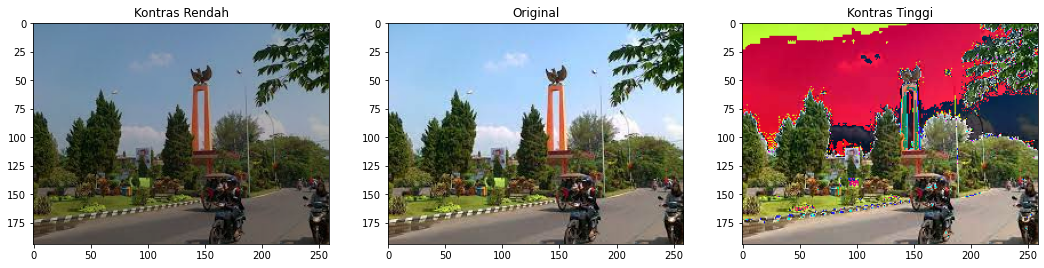

In [41]:
## Ikon kota
matrix1 = np.ones(img_rgb.shape) * 0.7
matrix2 = np.ones(img_rgb.shape) * 1.3

img_rgb_gelap   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_terang = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_gelap);  plt.title("Kontras Rendah");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_terang);plt.title("Kontras Tinggi");

#### Jika ada overflow, cegah dengan clip
Tampilkan hasilnya dan beri komentar, apa bedanya dengan gambar aslinya.

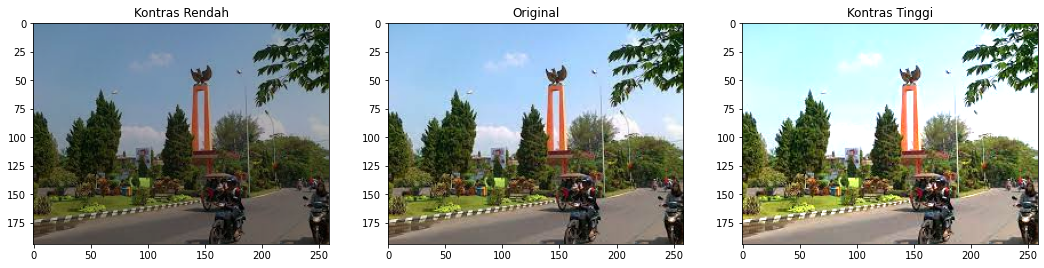

In [42]:
## Mencegah overflow dengan clip
img_rgb_terang  = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_gelap);  plt.title("Kontras Rendah");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_terang);plt.title("Kontras Tinggi");

### Image Thresholding
Memakai OpenCV, 
1. Bukalah file gambar ikon kotamu sebagai grayscale image
2. Ubah gambar grayscale itu menjadi gambar biner, dengan thresholding 50, 127, 200

Tampilkan hasilnya dan beri komentar. Apa beda di antara ketiganya?


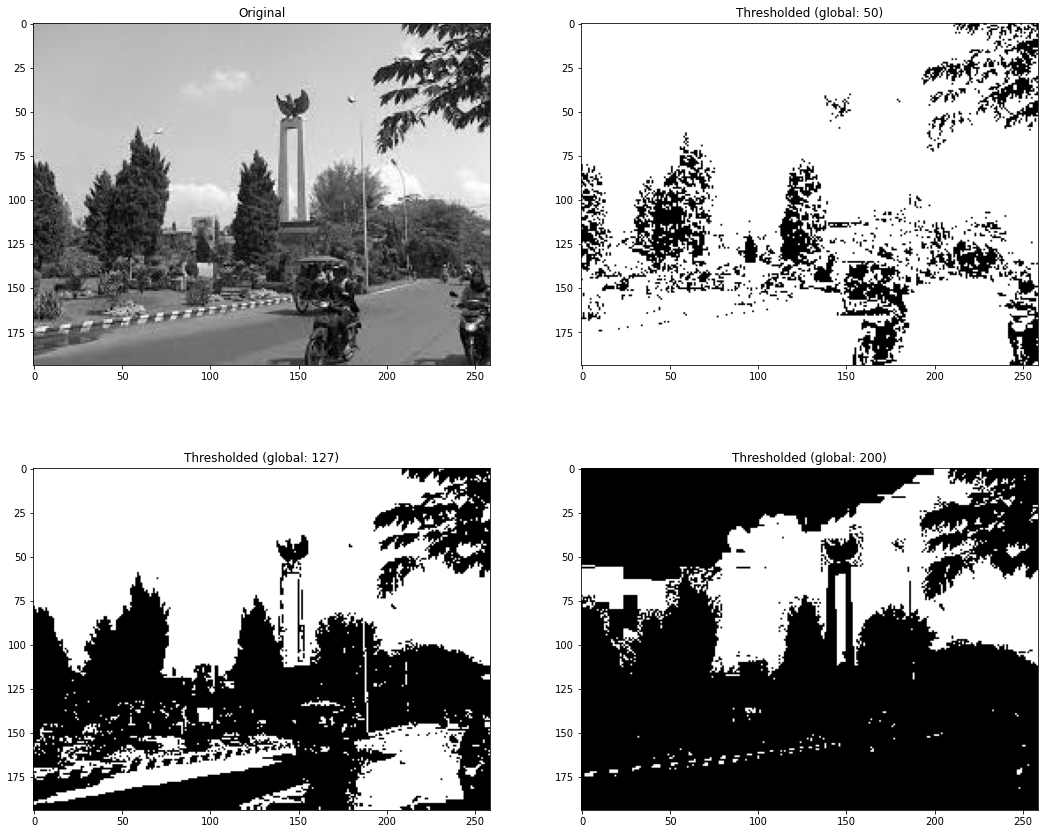

In [43]:
## Thresholding
# Read the original image
img_read = cv2.imread("tugu.jpg", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read,50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read,127, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_3 = cv2.threshold(img_read,200, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 127)");
plt.subplot(224); plt.imshow(img_thresh_gbl_3,cmap="gray");  plt.title("Thresholded (global: 200)");

perbedaan dari ketiganya yaitu terletak pada nilai yang diberikan.

### Application
Memakai `ums-line.png` dan `SW_1280x720.jpg`, buatlah tulisan 'UMS' menjadi foreground, dan gambar gedung SW sebagai background. Tulisan putih 'UMS' akan diganti dengan gambar gedung. Lakukan seperti yang ada di video.

Jika kamu akan me-resize gambar gedungnya, aspect ratio -nya tidak boleh berubah. Kamu juga dipersilakan meng-crop (memakai OpenCV) gambar gedung agar ukurannya sama dengan foreground.

(451, 856, 3)


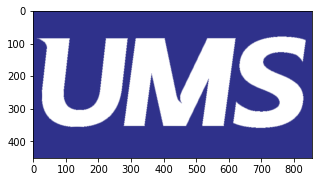

In [45]:
img_bgr = cv2.imread("ums.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=[5,5])
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(451, 856, 3)


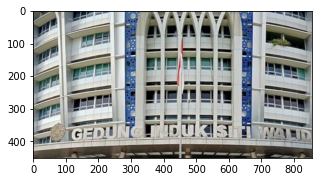

In [46]:
img_background_bgr = cv2.imread("SW_1280x720.jpg")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

crop= img_background_rgb[200:651,200:1056]
plt.figure(figsize=[5,5])
plt.imshow(crop) 
print(crop.shape)

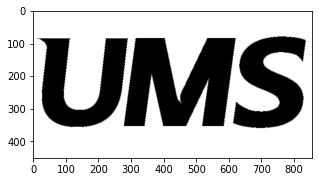

In [47]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

img_mask_inv = cv2.bitwise_not(img_mask)
plt.figure(figsize=[5,5])
plt.imshow(img_mask_inv,cmap="gray")

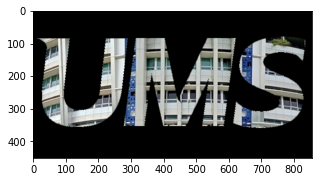

In [48]:
img_background = cv2.bitwise_and(crop, crop, mask=img_mask)
plt.figure(figsize=[5,5])
plt.imshow(img_background)

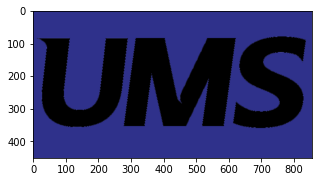

In [49]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.figure(figsize=[5,5])
plt.imshow(img_foreground)

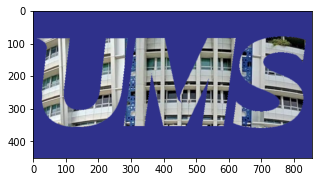

In [50]:
# Add the two previous results obtain the final result
result = cv2.add(img_background,img_foreground)
plt.figure(figsize=[5,5])
plt.imshow(result)